In [1]:
import os,sys
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager
import pandas as pd
import numpy as np
import seaborn as sns

### CASF2016 docking power success rate

In [16]:
csvfn = "./CASF2016_MS_docking_power_success_rate.csv"
df = pd.read_csv(csvfn)

# manually add the data for RosettaGenFF-VS
# from file: ./power_docking/scores_docking_power_eval_docking_cpp_relax_lig_mcentropy_ligcst1.out
ga_df = {'Scoringfunction': ['RosettaGenFF-VS'], 'Top1': [0.909], 'Top2': [0.944], 'Top3': [0.968]}
df_temp = pd.DataFrame.from_dict(ga_df)
df = pd.concat([df, df_temp], ignore_index=True)

In [18]:
df.sort_values(by=["Top1", "Top2", "Top3"], ascending=True, inplace=True)
df.tail()

,Scoringfunction,Top1,Top2,Top3
3,DrugScoreCSD,0.874,0.933,0.951
2,GlideScore-SP,0.877,0.919,0.937
1,ΔVinaRF20,0.891,0.944,0.965
0,AutodockVina,0.902,0.958,0.972
34,RosettaGenFF-VS,0.909,0.944,0.968


In [19]:
fields = ["Top1","Top2","Top3"]
colors = ['xkcd:azure', 'lime', 'coral']
labels = ["Top 1","Top 2","Top 3"]

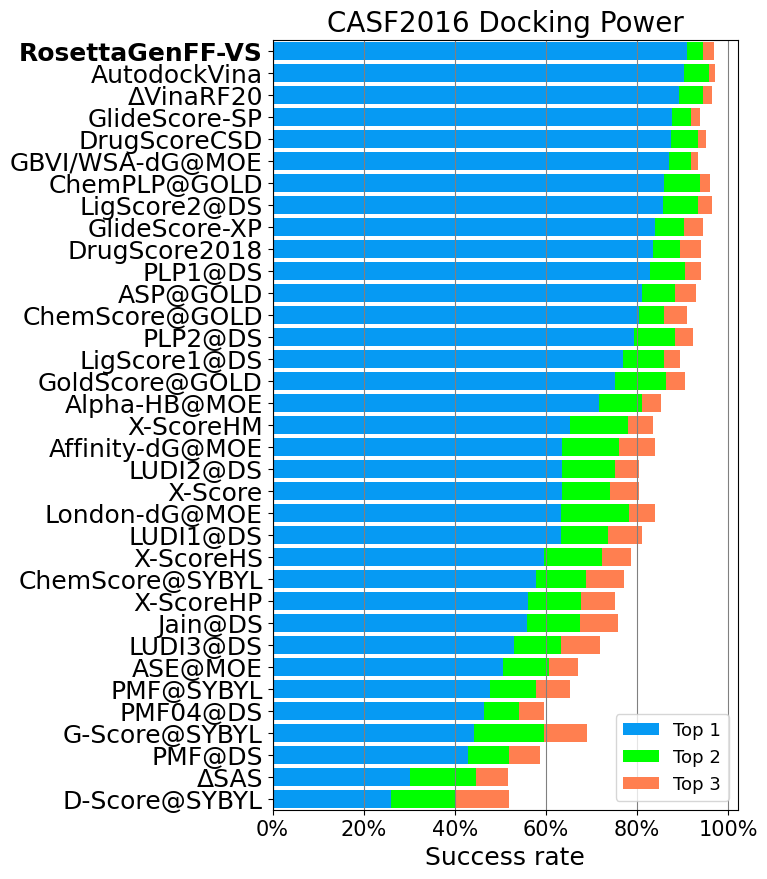

In [20]:
fig, ax = plt.subplots(1, figsize=(6, 10))
left = np.zeros(len(df))
for i, name in enumerate(fields):
    plt.barh(df['Scoringfunction'], df[name]-left, left=left, color=colors[i])
    left = df[name]
plt.legend(labels, ncol=1, frameon=True, fontsize=13)
xticks = np.arange(0,1.1,0.2)
xlabels = [f'{i:.0%}' for i in xticks]
plt.xticks(xticks, xlabels, fontsize=15)
# Create a font object
font = font_manager.FontProperties(weight='bold')

# Loop over ytick labels and set font properties
for label in ax.get_yticklabels():
    if label.get_text() == 'RosettaGenFF-VS':
        label.set_fontproperties(font)
        
plt.yticks(fontsize=18)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.xaxis.grid(color='gray', linestyle='solid')
ax.set_xlabel("Success rate", fontsize=18)
plt.title(f"CASF2016 Docking Power", fontsize=20)
#plt.savefig("CASF2016_docking_power_success_rate.svg", dpi=300, bbox_inches='tight')

    Scoringfunction   Top1   Top2   Top3
8     DrugScore2018  0.835  0.895  0.940
7     GlideScore-XP  0.839  0.902  0.944
6      LigScore2@DS  0.856  0.933  0.965
5      ChemPLP@GOLD  0.860  0.937  0.961
4   GBVI/WSA-dG@MOE  0.870  0.919  0.933
3      DrugScoreCSD  0.874  0.933  0.951
2     GlideScore-SP  0.877  0.919  0.937
1         ΔVinaRF20  0.891  0.944  0.965
0      AutodockVina  0.902  0.958  0.972
34  RosettaGenFF-VS  0.909  0.944  0.968
10


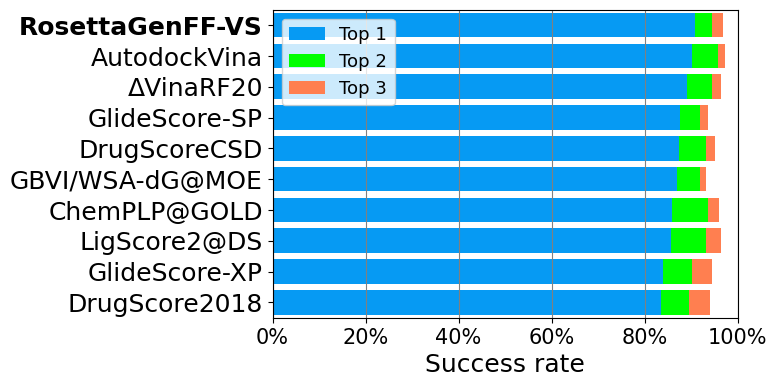

In [14]:
nreport=10
fig, ax = plt.subplots(1, figsize=(6, 4))
df_new = df.iloc[-nreport:]
print(df_new)
print(len(df_new))
left = np.zeros(len(df_new))
for i, name in enumerate(fields):
    plt.barh(df_new['Scoringfunction'], df_new[name]-left, left=left, color=colors[i])
    left = df_new[name]
plt.legend(labels, ncol=1, frameon=True, fontsize=13)
xticks = np.arange(0,1.1,0.2)
xlabels = [f'{i:.0%}' for i in xticks]
plt.xticks(xticks, xlabels, fontsize=15)
# Create a font object
font = font_manager.FontProperties(weight='bold')

# Loop over ytick labels and set font properties
for label in ax.get_yticklabels():
    if label.get_text() == 'RosettaGenFF-VS':
        label.set_fontproperties(font)
plt.yticks(fontsize=18)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
plt.xlim(0.0, 1.0)
ax.xaxis.grid(color='gray', linestyle='solid')
ax.set_xlabel("Success rate", fontsize=18)
#plt.title(f"CASF2016 Docking Power", fontsize=20)
#plt.savefig(f"CASF2016_docking_power_success_rate.top{nreport}.svg", dpi=300, bbox_inches='tight')

### plot binding funnel analysis

In [2]:
csvfn="casf2016_binding_funnel_analysis.csv"
df = pd.read_csv(csvfn)
df.set_index('Scoring Function', inplace=True)
df.head()


,0~2A,0~3A,0~4A,0~5A,0~6A,0~7A,0~8A,0~9A,0~10A
Scoring Function,,,,,,,,,
RosettaGenFF-VS,0.665,0.707,0.693,0.658,0.624,0.585,0.559,0.530,0.506
Autodock Vina,0.605,0.618,0.577,0.524,0.476,0.424,0.391,0.361,0.337
ΔVinaRF20,0.608,0.623,0.585,0.533,0.486,0.436,0.405,0.375,0.351
GlideScore-SP,0.512,0.529,0.504,0.474,0.438,0.403,0.374,0.346,0.324
DrugScoreCSD,0.609,0.625,0.593,0.549,0.508,0.464,0.435,0.407,0.385


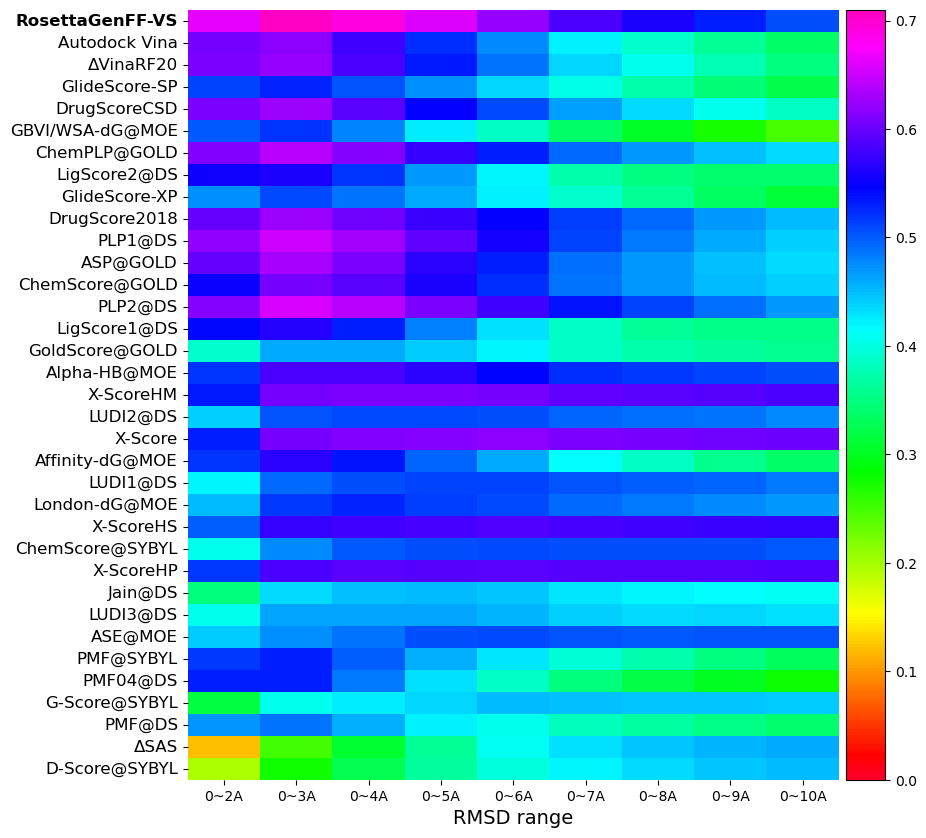

In [5]:
fig, ax1 = plt.subplots(ncols=1, figsize=(10,10))
fig.subplots_adjust(wspace=0.1)
cmap = "gist_rainbow"
#cmap = "YlGnBu"
#cmap= "rocket"
sns.heatmap(df.loc[:,'0~2A':'0~10A'], cmap=cmap, ax=ax1, cbar=False, vmin=0.0, vmax=0.71)
#fig.colorbar(ax1.collections[0], ax=ax1, location="right", use_gridspec=False, pad=0.2)
#print(ax1.set_box_aspect(12))
# Create a font object
font = font_manager.FontProperties(weight='bold')

# Loop over ytick labels and set font properties
for label in ax1.get_yticklabels():
    if label.get_text() == 'RosettaGenFF-VS':
        label.set_fontproperties(font)
ax1.tick_params(axis='y', labelsize=12)
ax1.set_ylabel('')
fig.colorbar(ax1.collections[0], ax=(ax1), location="right", use_gridspec=False, pad=0.01)
plt.xlabel("RMSD range", fontsize=14)
#plt.savefig("CASF2016_binding_funnel_analysis.png", dpi=300, bbox_inches='tight')